In [90]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mplt
import matplotlib.pyplot as plt
%matplotlib inline

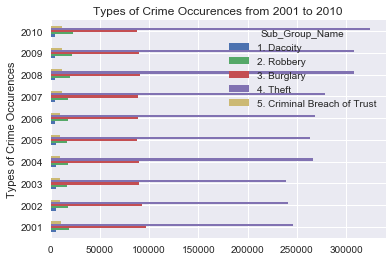

In [364]:
## ROBERRY AND THEFT CRIME ANALYSIS
#Analysis: Most common type: Theft 

file3='/Users/sanjana/Desktop/project/crime/10_Property_stolen_and_recovered.csv'
df = pd.read_csv(file3)
crimeDf=df.groupby(['Year','Sub_Group_Name']).sum()
df2=crimeDf['Cases_Property_Stolen'].unstack(level=-1)
df2=df2.drop(['7. Total Property Stolen & Recovered'], axis=1)
df2=df2.drop(['6. Other Property'], axis=1)
df2
ct=df2.plot.barh()
ct.set_ylabel('Types of Crime Occurences')
ct.set_title('Types of Crime Occurences from 2001 to 2010')
mplt.pyplot.savefig('type_prop_stolen.png')
plt.show()


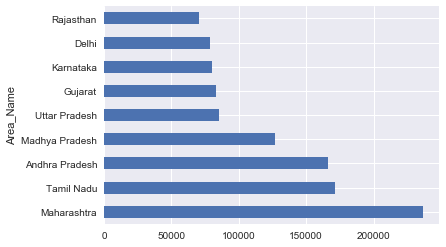

In [385]:
#High crime regions
crimeDf=df.groupby(['Sub_Group_Name','Area_Name']).sum()
df2=crimeDf['Cases_Property_Recovered'].unstack(level=-1).fillna(0)
df2=df2.T
states=df2['7. Total Property Stolen & Recovered'].sort_values(ascending=False)[0:9].index
df2['7. Total Property Stolen & Recovered'].sort_values(ascending=False)[0:9].plot.barh()

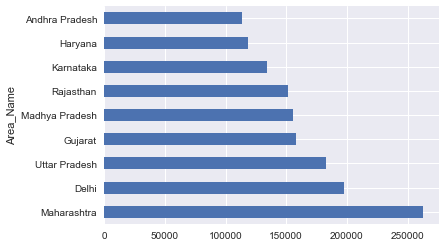

In [393]:
file4='/Users/sanjana/Desktop/project/crime/30_Auto_theft.csv'
df = pd.read_csv(file4)
df= df.fillna(0)
crimeDf=df.groupby(['Area_Name']).sum()
crimeDf['Auto_Theft_Stolen'].sort_values(ascending=False)[0:9].plot.barh()

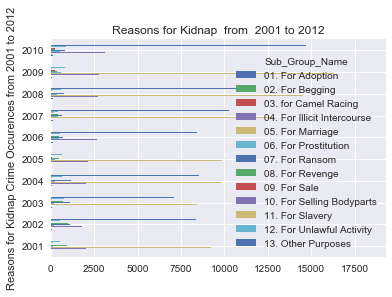

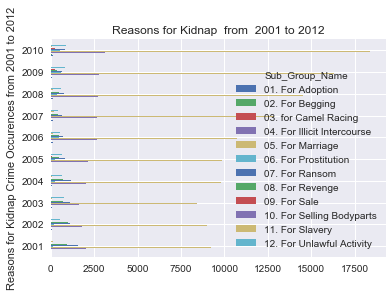

In [304]:
##KIDNAPS AND ABDUCTION ANALYSIS::
#Analysis: We identify the 10 major states with high kidnap rates
# We identify the major reason behind the kidnap for these states
#We identify the number of males and females kidnapped in these regions
#We identify the age group of the victims

#Seems like most kidnaps occur for the purpose of slavery and unknown reasons-- values have increased over the decade from 
#2001 to 2010
file3='/Users/sanjana/Desktop/project/39_Specific_purpose_of_kidnapping_and_abduction.csv'
df = pd.read_csv(file3)

#Analysis on age group, reason, state per year

crimeDf=df.groupby(['Year','Sub_Group_Name']).sum()
df2=crimeDf['K_A_Grand_Total'].unstack(level=-1)
df2=df2.drop(['14. Total (Sum of 1-13 Above)'], axis=1)
df2
ct=df2.plot.barh()
ct.set_ylabel('Reasons for Kidnap Crime Occurences from 2001 to 2012')
ct.set_title('Reasons for Kidnap  from  2001 to 2012')
mplt.pyplot.savefig('kidnap_reasons_plot1.png')
plt.show()


df3=df2.drop(['13. Other Purposes'], axis=1)
df3
ct2=df3.plot.barh()
ct2.set_ylabel('Reasons for Kidnap Crime Occurences from 2001 to 2012')
ct2.set_title('Reasons for Kidnap  from  2001 to 2012')
mplt.pyplot.savefig('kidnap_reasons_plot2.png')
plt.show()


In [173]:
#In which state
crimeDf=df.groupby(['Year','Sub_Group_Name','Area_Name']).sum()
crimeDf
df2=crimeDf['K_A_Grand_Total'].unstack(level=-1).fillna(0)
#df2=df2.drop(['14. Total (Sum of 1-13 Above)'], axis=1)

df2.reset_index(inplace=True) #Convert to dataframe

df2

In [174]:
df2=df2.loc[(df2['Sub_Group_Name'] == '14. Total (Sum of 1-13 Above)')]
df2=df2.drop(['Sub_Group_Name'], axis=1)
df2=df2.T
df2=df2.drop(['Year'], axis=0)
#A steady increase in the number of kidnaps per state -- 
#Uttar Pradesh has the highest record followed by Delhi Bihar and WB

df2=df2[(df2.index=='Andhra Pradesh') | (df2.index=='Maharashtra') | (df2.index=='Assam') | (df2.index=='West Bengal') | (df2.index=='Bihar') | (df2.index=='Madhya Pradesh') | (df2.index=='Delhi') | (df2.index=='Rajasthan') | (df2.index=='Uttar Pradesh') | (df2.index=='Tamil Nadu') | (df2.index=='Guajrat') ]
df2.columns=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
ct2=df2.plot.barh()
ct2.set_ylabel('Top ten states from 2001 to 2010')
ct2.set_title('state vs total kidnaps for from 2001 to 2010')
mplt.pyplot.savefig('kidnap_state.png')
plt.show()
df2

In [305]:
##For Uttar Pradesh , Delhi Bihar Assam and WB: We analze the reasons behind kidnap
df3= df.loc[(df['Area_Name'] == 'Uttar Pradesh') | (df['Area_Name'] == 'Delhi') | (df['Area_Name'] == 'Bihar') | (df['Area_Name'] == 'West Bengal') | (df['Area_Name'] == 'Assam')]
df3
crimeDf=df3.groupby(['Area_Name','Sub_Group_Name']).mean()

df2=crimeDf['K_A_Grand_Total'].unstack(level=-1).fillna(0)
#df2=df2.drop(['14. Total (Sum of 1-13 Above)'], axis=1)
df2.reset_index(inplace=True) 



In [306]:
df2.index=['Assam','Bihar','Delhi','Uttar Pradesh','West Bengal']
df2.drop(['Area_Name'], axis=1)
df2=df2.drop(['14. Total (Sum of 1-13 Above)'], axis=1)

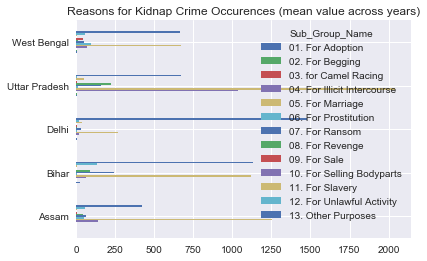

In [307]:
ct=df2.plot.barh()
ct.set_title('Reasons for Kidnap Crime Occurences (mean value across years)')
mplt.pyplot.savefig('kidnap_reasons_per_state.png')
plt.show()
#Seems like the major reason behind kidnap is unknown
#Assam UP  WB Bihar --> for marriage while in Delhi -- mostly unkonwn reason

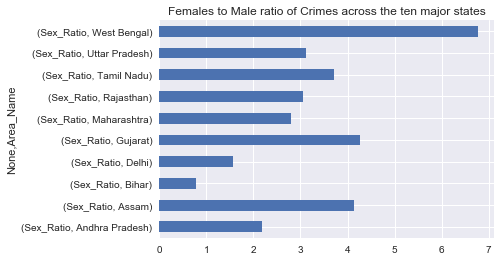

In [322]:
#Ratio of male to female kidnaps across the 10 major states
df3= df.loc[(df['Area_Name'] == 'Uttar Pradesh') | (df['Area_Name'] == 'Delhi') | (df['Area_Name'] == 'Bihar') | (df['Area_Name'] == 'Andhra Pradesh') |(df['Area_Name'] == 'West Bengal') | (df['Area_Name'] == 'Assam') | (df['Area_Name'] == 'Gujarat') | (df['Area_Name'] == 'Rajasthan') | (df['Area_Name'] == 'Tamil Nadu') | (df['Area_Name'] == 'Maharashtra')]
crimeDf=df3.groupby(['Area_Name']).mean()
crimeDf=crimeDf.drop(['Year'], axis=1)
crimeDf['Sex_Ratio']= crimeDf['K_A_Female_Total']/crimeDf['K_A_Male_Total']
df2=crimeDf[['Sex_Ratio']].unstack(level=-1).fillna(0)

ct=df2.plot.barh()
ct.set_title('Females to Male ratio of Crimes across the ten major states')
mplt.pyplot.savefig('state_sexRatio.png')
plt.show()
#West Bengal has the highest number of women kidnapped followed by  Gujrat Assam and TN

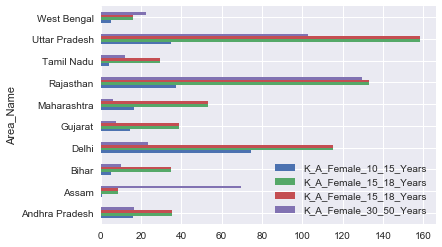

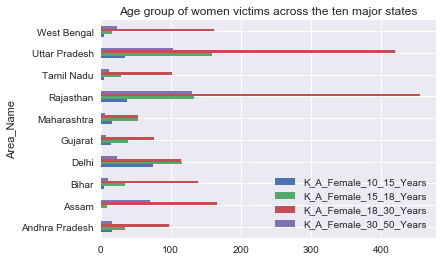

In [319]:
#age groups of kidnapped victims-female
df2=crimeDf[['K_A_Female_10_15_Years','K_A_Female_15_18_Years','K_A_Female_18_30_Years','K_A_Female_30_50_Years']]

ct=df2.plot.barh()
ct.set_title('Age group of women victims across the ten major states')
mplt.pyplot.savefig('state_ageWomen.png')
plt.show()
#Prime target in high crime regions are women from 18 -30 years
#While Delhi primarily targets women from 15 -30 years

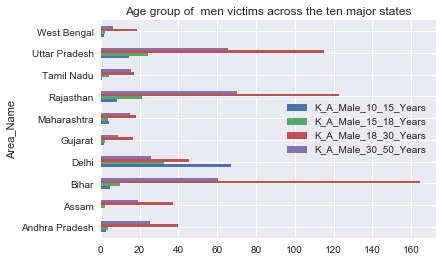

In [321]:
#age groups of kidnapped victims-male
df2=crimeDf[['K_A_Male_10_15_Years','K_A_Male_15_18_Years','K_A_Male_18_30_Years','K_A_Male_30_50_Years']]

ct=df2.plot.barh()
ct.set_title('Age group of  men victims across the ten major states')
mplt.pyplot.savefig('state_ageMen.png')
plt.show()
#Prime target in high crime regions are men from 18 -30 years
#While Delhi primarily targets men from 10 -15 years
#Child Abduction in New Delhi

In [336]:
#New Delhi -- Analyzing reason for crime : MAinly Ransom of Boys-- Abduction
crimeDf['K_A_Male_Total'].sort_values(ascending=False)


Sub_Group_Name
14. Total (Sum of 1-13 Above)    75826.0
13. Other Purposes               53804.0
07. For Ransom                    8092.0
08. For Revenge                   4828.0
12. For Unlawful Activity         4516.0
05. For Marriage                  2375.0
11. For Slavery                    728.0
04. For Illicit Intercourse        605.0
01. For Adoption                   493.0
02. For Begging                    153.0
09. For Sale                       116.0
06. For Prostitution               105.0
10. For Selling Bodyparts           11.0
03. for Camel Racing                 0.0
Name: K_A_Male_Total, dtype: float64

Sub_Group_Name
14. Total (Sum of 1-13 Above)    75826.0
13. Other Purposes               53804.0
07. For Ransom                    8092.0
08. For Revenge                   4828.0
12. For Unlawful Activity         4516.0
05. For Marriage                  2375.0
11. For Slavery                    728.0
04. For Illicit Intercourse        605.0
01. For Adoption                   493.0
02. For Begging                    153.0
09. For Sale                       116.0
06. For Prostitution               105.0
10. For Selling Bodyparts           11.0
03. for Camel Racing                 0.0
Name: K_A_Male_Total, dtype: float64

In [330]:
crimeDf

,Year,K_A_Cases_Reported,K_A_Female_10_15_Years,K_A_Female_15_18_Years,K_A_Female_18_30_Years,K_A_Female_30_50_Years,K_A_Female_Above_50_Years,K_A_Female_Total,K_A_Female_Upto_10_Years,K_A_Grand_Total,K_A_Male_10_15_Years,K_A_Male_15_18_Years,K_A_Male_18_30_Years,K_A_Male_30_50_Years,K_A_Male_Above_50_Years,K_A_Male_Total,K_A_Male_Upto_10_Years
Sub_Group_Name,,,,,,,,,,,,,,,,,
01. For Adoption,2005.493617,4.111588,0.190955,0.613065,1.321608,0.071795,0.000000,2.227488,0.161765,4.261062,0.170000,0.153061,1.308824,0.420000,0.015544,2.220721,0.348837
02. For Begging,2005.488889,1.142857,0.143590,0.031250,0.170984,0.041667,0.000000,0.580952,0.231527,1.250000,0.266332,0.031250,0.197917,0.005208,0.000000,0.714953,0.265700
03. for Camel Racing,2005.489899,0.025510,0.000000,0.000000,0.015789,0.010526,0.000000,0.026178,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
04. For Illicit Intercourse,2005.503650,86.230769,6.701961,16.393822,53.467181,12.686441,0.123223,84.675277,0.553571,87.229630,0.206422,0.305556,1.336406,0.867299,0.009615,2.750000,0.090047
05. For Marriage,2005.510836,368.405573,19.709343,74.107595,248.777049,42.462963,0.533613,361.399381,0.620833,368.752322,0.100877,1.154167,6.651639,1.842105,0.084821,9.814050,0.056277
06. For Prostitution,2005.484848,11.831169,1.112195,3.896226,8.714286,1.456311,0.256281,14.838565,0.063725,15.173333,0.019802,0.024631,0.258537,0.178218,0.015075,0.509709,0.019608
07. For Ransom,2005.613240,30.721254,0.267857,0.281938,3.461864,0.903930,0.069444,4.898039,0.378855,32.775439,2.528689,2.565574,14.122137,8.513410,1.144068,28.900000,2.638554
08. For Revenge,2005.469231,22.319231,0.363208,0.652381,2.548673,0.718182,0.047619,4.390756,0.402778,22.941406,0.729358,1.562212,10.879668,6.097458,0.665158,19.083004,0.559633
09. For Sale,2005.490741,2.898148,0.220000,0.380711,1.548223,0.439791,0.157068,2.780488,0.160804,3.282297,0.025510,0.076923,0.208122,0.092784,0.094241,0.574257,0.095000
